### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 8: Interpretação de Resultados

#### Importar a Base de dados

In [2]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [105]:
import pandas as pd

tabela = pd.read_csv(r"D:\Projetos\Python\PythonIntensivao_2022\CienciaDados\data\advertising.csv")
display(tabela)

#tratamento de dados
print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

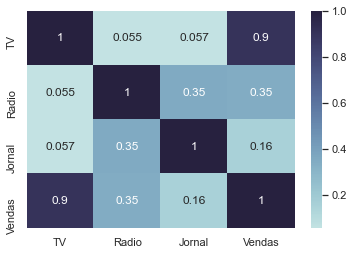

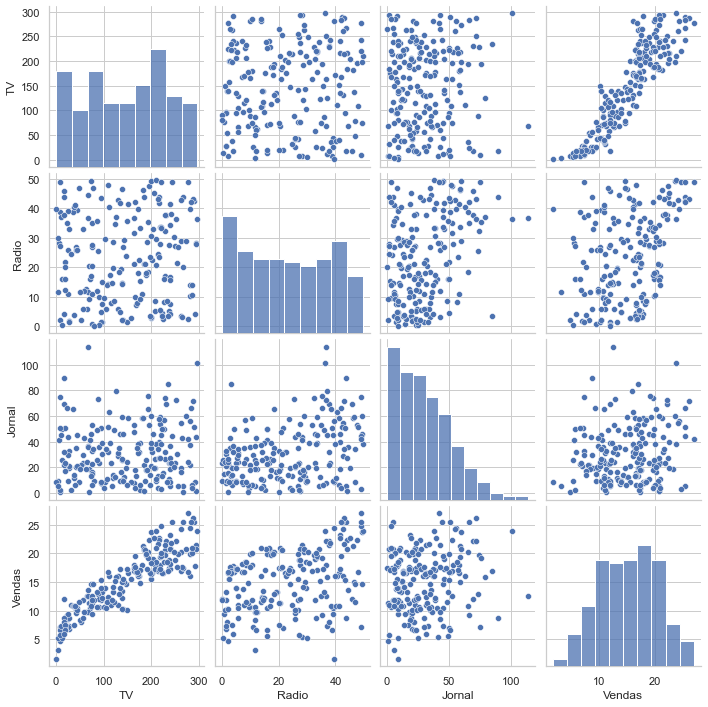

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

#criar grafico
#heatmap = tipo de gráfico()
#tabela.corr() = correlação da tabela
#annot=True = números dentro dos gráficos
#cmap = paleta de cores 
color=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(tabela.corr(), annot=True, cmap=color)


#mostrar o gráfico por correlação
plt.savefig(r"D:\Projetos\Python\PythonIntensivao_2022\CienciaDados\imgs\exploratoria1.png", dpi = 300)
plt.show()

# outra forma de ver a mesma análise
sns.pairplot(tabela)
plt.savefig(r"D:\Projetos\Python\PythonIntensivao_2022\CienciaDados\imgs\exploratoria2.png", dpi = 300)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [122]:
from sklearn.model_selection import train_test_split

#treinando e teste da IA
y = tabela["Vendas"] #quem eu vou prever
x = tabela.drop("Vendas", axis=1) #quem eu vou USAR para prever as vendas (ignorei somente a coluna "Vendas")
# x = tabela[["TV", "Radio", "Jornal"]] #outra forma de obter x

#separar os dados de treino e de teste
#tem que ser nesta ordem (x_treino, x_teste, y_treino, y_teste)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)
#test_size=0.3 = o train_test_slit utilizará 20% dos meus dados para teste e 80% de treino, isso pode ser configurado com quiser

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [124]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear)) # 88% de assertividade
print(metrics.r2_score(y_teste, previsao_arvoredecisao)) # 94% de assertividade

0.8883210192316215
0.9441778036234745


#### Visualização Gráfica das Previsões

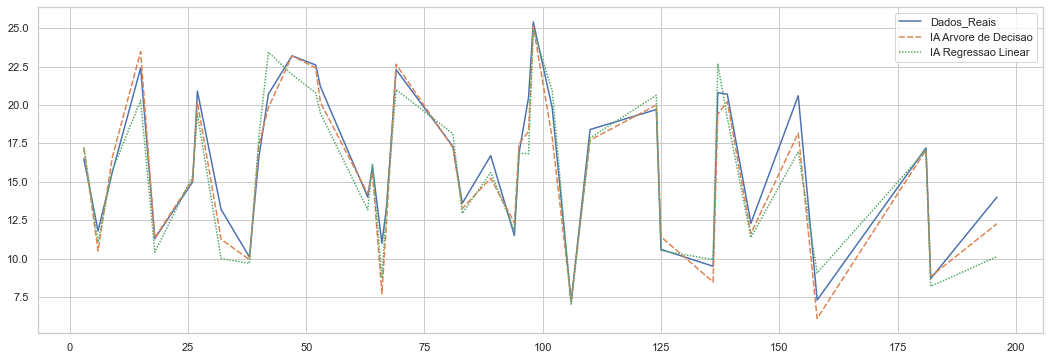

In [128]:
sns.set_theme(style="whitegrid")

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Dados_Reais"] = y_teste
tabela_auxiliar["IA Arvore de Decisao"] = previsao_arvoredecisao
tabela_auxiliar["IA Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(18,6))
sns.lineplot(data=tabela_auxiliar)
plt.savefig(r"D:\Projetos\Python\PythonIntensivao_2022\CienciaDados\imgs\assertividade_IA.png", dpi = 300)
plt.show()

#### Como fazer uma nova previsao?

In [126]:
# Como fazer uma nova previsao

# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
nova_tabela = pd.read_csv(r"D:\Projetos\Python\PythonIntensivao_2022\CienciaDados\data\novos.csv")
display(nova_tabela)

# previsao = modelo_randomforest.predict(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)

# print(previsao)
print(previsao)

# inserindo os valores em uma coluna nova
nova_tabela.insert(loc=3, column="PrevVendas", value=previsao)
nova_tabela.head()

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.706  8.65  19.882]


,TV,Radio,Jornal,PrevVendas
0,23.1,3.8,69.2,7.706
1,44.5,0.0,5.1,8.650
2,170.2,45.9,0.0,19.882


#### Qual a importância de cada variável para as vendas?

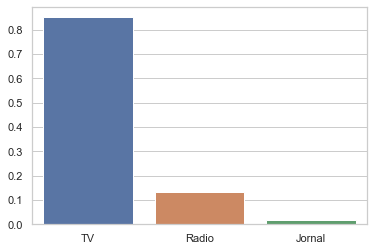

Radio     49.7
Jornal    74.3
dtype: float64


In [127]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.savefig(r"D:\Projetos\Python\PythonIntensivao_2022\CienciaDados\imgs\resultFinal.png", dpi = 300)
plt.show()

# Caso queira comparar Radio com Jornal
print(nova_tabela[["Radio", "Jornal"]].sum())